## Project: Machine Learning Classification
## Dataset: Breast Cancer (from sklearn)

##### Step 1: Import Libraries
##### In this step, we will import all the necessary libraries for the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#####  Step 2: Load Dataset
##### Load the Breast Cancer dataset from sklearn and convert it into a pandas DataFrame.

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

##### Step 3: Explore Dataset ( Explore the dataset structure.)
##### - Show first 5 rows


In [4]:
display(df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##### - Display shape and dtypes


In [5]:
print("Shape of the DataFrame:", df.shape)
print("\nData types of the columns:")
print(df.dtypes)

Shape of the DataFrame: (569, 31)

Data types of the columns:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            f

##### - Check for missing values

In [6]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


##### Step 4: Check Class Balance
##### - Check distribution of the target classes. (Use count chart to visualize.)

In [7]:
target = data.target

# Use value_counts() on the 'target' column to check the class distribution

# here your code  👇🏻
print("Target Class Distribution:\n", df['target'].value_counts())

Target Class Distribution:
 target
1    357
0    212
Name: count, dtype: int64


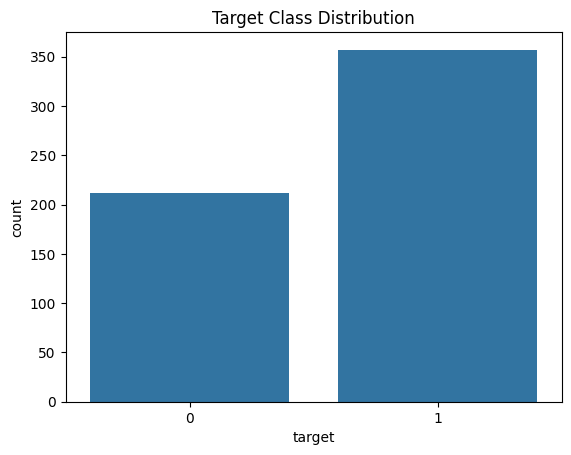

In [10]:
# Plot the class distribution using seaborn countplot

sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")

# Show the plot
plt.show()

##### Step 5: Split Data
##### - Split dataset into training and testing sets (70/30 split).

In [11]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Step 6: Preprocessing
##### - Apply feature scaling using StandardScaler.

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)               # Fit the scaler on X_train and transform it
X_test = scaler.transform(X_test)                # Use the same scaler to transform X_test

##### Step 7: Train Baseline Models
##### Train three baseline classifiers: DecisionTree, RandomForest, and SVM.

In [13]:
# Decision Tree
clf_tree = DecisionTreeClassifier(random_state=42)                         # Initialize DecisionTreeClassifier with random_state=42

# Fit the model
clf_tree.fit(X_train, y_train)                                    # Fit the model on the training data (X_train, y_train)

# Predict the model
y_pred_tree = clf_tree.predict(X_test)                                    # Use the trained model to predict on X_test

In [14]:
# Print Decision Tree results
print("Decision Tree Results:")

# Print accuracy score (use y_test and the predictions from Decision Tree)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

# Print detailed classification report (use y_test and the predictions from Decision Tree)
print(classification_report(y_test, y_pred_tree))

Decision Tree Results:
Accuracy: 0.9415204678362573
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [15]:
# Random Forest
clf_rf = RandomForestClassifier(random_state=42) # Initialize RandomForestClassifier with random_state=42


# Fit the model
clf_rf.fit(X_train, y_train)                     # Fit the model on the training data (X_train, y_train)


# Predict the model
y_pred_rf = clf_rf.predict(X_test)                # Predict on X_test

In [16]:
# Print Random Forest results
print("Random Forest Results:")

print("Accuracy:", accuracy_score(y_test, y_pred_rf)) # Use y_test and predictions

print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [17]:
# SVM
clf_svm = SVC(random_state=42)                              # Initialize SVC


# Fit the model
clf_svm.fit(X_train, y_train)                                        # Fit the model on the training data (X_train, y_train)


# Predict the model
y_pred_svm = clf_svm.predict(X_test)                                        # Predict on X_test

In [18]:
# Print SVM results
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))                        # Use y_test and predictions
print(classification_report(y_test, y_pred_svm))                              # Use y_test and predictions

SVM Results:
Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



##### Step 8: Hyperparameter Tuning
##### Use GridSearchCV to tune hyperparameters of one model (SVM).


In [19]:
param_grid = {
'C': [0.1, 1, 10],
'kernel': ['linear', 'rbf']
}

svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)


# Fit the grid search
grid.fit(X_train, y_train)                                        # Fit on training data (X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [20]:
# Print best parameters and best score
print("Best Params:", grid.best_params_)                             # grid.best_params_
print("Best CV Score:", grid.best_score_)                           # grid.best_score_

Best Params: {'C': 0.1, 'kernel': 'linear'}
Best CV Score: 0.9748417721518987


##### Step 9: Final Evaluation
##### Evaluate the best model from GridSearch on the test set.



In [21]:
# Print final tuned model results
print("Final Tuned SVM Results:")
y_pred_tuned_svm = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tuned_svm))                          # Use y_test and predictions
print(classification_report(y_test, y_pred_tuned_svm))                                # Use y_test and predictions

Final Tuned SVM Results:
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [23]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the trained model and scaler
# Make sure the model and scaler files are in the same directory as this script
try:
    with open('best_svm_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
except FileNotFoundError:
    st.error("Model or scaler file not found. Please make sure 'best_svm_model.pkl' and 'scaler.pkl' are in the same directory.")
    st.stop()


st.title('Breast Cancer Prediction')

st.write("""
This app predicts whether a tumor is benign or malignant based on the input features.
""")

# Create input fields for all features
st.sidebar.header('Input Features')

def user_input_features():
    features = {}
    for col in X.columns:
        features[col] = st.sidebar.slider(col, float(X[col].min()), float(X[col].max()), float(X[col].mean()))
    data = pd.DataFrame(features, index=[0])
    return data

input_df = user_input_features()

st.subheader('User Input features')
st.write(input_df)

# Scale the input features
input_scaled = scaler.transform(input_df)

# Make prediction
prediction = model.predict(input_scaled)
prediction_proba = model.predict_proba(input_scaled)

st.subheader('Prediction')
st.write('Malignant' if prediction[0] == 0 else 'Benign')

st.subheader('Prediction Probability')
st.write(prediction_proba)

Writing app.py


In [24]:
import pickle

# Save the trained model
with open('best_svm_model.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)